In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

Next, we will generate a binary classification dataset using the make-classification() function, with 1000 samples and 20 features.

In [3]:
# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=0)

In [4]:
X

array([[-1.06377997,  0.67640868,  1.06935647, ..., -0.35562842,
         1.05721416, -0.90259159],
       [ 0.0708476 , -1.69528125,  2.44944917, ...,  0.01708348,
        -0.37566904, -0.62323644],
       [ 0.94028404, -0.49214582,  0.67795602, ..., -0.06946407,
         1.35904607, -1.18958963],
       ...,
       [-0.5348271 , -0.74645927,  0.86505187, ..., -1.30657958,
         0.2509557 , -0.9348867 ],
       [-1.03042542, -0.29607249,  2.78034649, ...,  0.05398851,
        -0.14987096,  2.78960064],
       [ 0.54272502,  0.30821962,  0.20152656, ...,  1.09537374,
         0.12630589, -1.42647315]])

In [5]:
y

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,

Let’s divide the dataset into training and test data–we’ll train the model on training set and measure its performance on the unseen test dataset.

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Next, we define the model object by calling the LogisticRegression() class and then train it using the fit method on the training data, where X_train has the features and y_train represents the labels.

In [7]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Now, the model is trained and ready to generate predictions. We call the predict_proba() function to generate the probability of a positive class. We use the predict() method to compute evaluation metrics such as accuracy, precision, recall, and F1-score.

In [8]:
# Predict the probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]

# Predict the classes for the test set
y_pred = model.predict(X_test)

In [9]:
# Calculate the AUC - ROC score
roc_auc = roc_auc_score(y_test, y_probs)

# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"AUC - ROC Score: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

AUC - ROC Score: 0.98
Accuracy: 0.97
Precision: 0.97
Recall: 0.96
F1 Score: 0.97


Now, let’s visualize the ROC curve along with the diagonal line representing a random chance model. To compute this, we require FPR and TPR for every discrete threshold between 0 and 1. In the graph below, the orange curve represents the ROC and the area under this curve is 0.93.

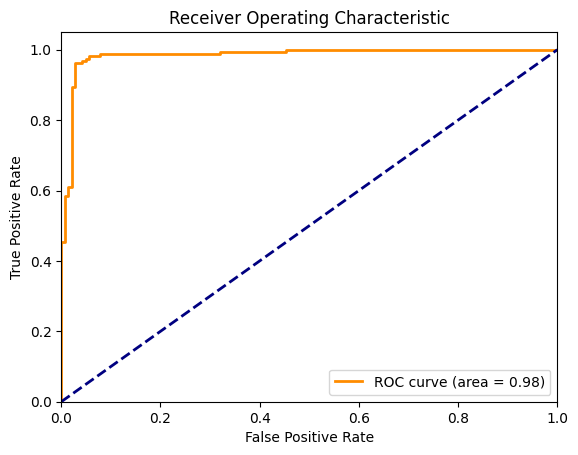

In [10]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Choosing the Best Algorithm using the ROC Curve
Now, let’s use the same dataset and compare the performance of four classification algorithms using ROC. We will start by importing the RandomForestClassifier, KNeighborsClassifier, and SVC and compare these with the LogisticRegression.

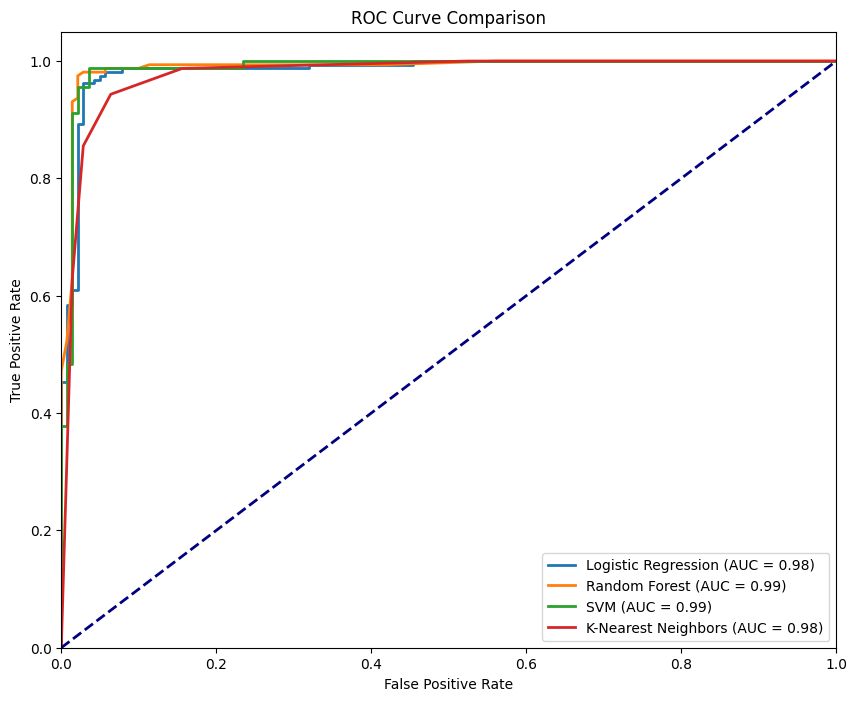

Logistic Regression: AUC - ROC = 0.98
Random Forest: AUC - ROC = 0.99
SVM: AUC - ROC = 0.99
K-Nearest Neighbors: AUC - ROC = 0.98


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Initialize a dictionary to store AUC - ROC scores
roc_auc_scores = {}

# Plot the ROC curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the probabilities
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate the AUC - ROC score
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_auc_scores[name] = roc_auc
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Print the AUC - ROC scores for each model
for name, score in roc_auc_scores.items():
    print(f'{name}: AUC - ROC = {score:.2f}')

### Interpreting the AUC value
AUC values provide a quick reference to understand how well the model is performing. When AUC is close to 1, our model is at the top of its game. It shows excellent performance with a strong ability to distinguish between classes. AUC around 0.5 is a concerning scenario, as it highlights that the model isn’t doing any better than random guessing, signaling no discriminatory power. An AUC score closer to 0 is an alarming situation. This indicates the model is getting it entirely wrong, even worse than a coin toss.

### True positive rate: measuring success
TPR, or sensitivity, is a critical metric that tells how well our model is capturing the positive instances. TPR is calculated as the proportion of actual positives correctly identified by the model. It’s a key indicator of our model’s effectiveness in detecting the true signals (positives). High TPR means our model is doing a great job of recognizing what matters most.

### False positive rate: gauging the noise
On the flip side, FPR helps us understand the noise—how often our model falsely identifies negatives as positives. FPR is the proportion of actual negatives that our model incorrectly flags as positives. It’s a vital metric for assessing the trade-offs our model is making. A high FPR indicates a tendency to produce false alarms, which can be costly depending on the application.

## Real-World Use Cases of the AUC-ROC Curve
AUC-ROC isn’t just a theoretical concept; here is how this practical metric is used across industries to drive critical decisions:

### Medical diagnostics
AUC-ROC is used to compare different diagnostic tests. It is especially useful when the cost of false negatives (for example, missing a disease) can be much more than false positives (for example, unnecessary treatment). A noteworthy example would be cancer screening, where the threshold for further testing can be adjusted based on risk factors and resource availability.

### Fraud detection
Machine learning models are increasingly used to identify fraudulent activities in the financial sector. Considering that fraud transactions are significantly rare, such datasets are highly imbalanced. Therefore,  AUC-ROC is an effective evaluation metric that also allows for adjusting the threshold based on various factors, such as the magnitude of the risk involved with the transaction, the cost of manually verifying each transaction and the cost of customer inconvenience.

### Cybersecurity 
Similar to fraud detection, cyber-attacks are also relatively rare events. Hence, AUC-ROC also finds application in cybersecurity, balancing between detecting threats and avoiding alert fatigue from false positives.

## Alternatives to the AUC-ROC Curve
AUC-ROC is a popular metric for evaluating binary classification models, but there are scenarios where alternative metrics may be more suitable. Let's explore some alternatives and when to use them:

### Precision-recall curve
The precision-recall curve (PRC) is a metric for imbalanced datasets that significantly impacts the value of the machine learning model when false positives and false negatives have different costs. Unlike AUC-ROC, which can give a misleadingly optimistic view in imbalanced datasets, PRC focuses more on performance concerning the positive class.

### F1 score
The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both. It's used when we need a clear, single-number summary of model performance especially in imbalanced datasets. AUC-ROC provides a more global view, while F1 is a specific point on the PRC curve.